In [1]:
import shap
import xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

/home/jn/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data1 = pd.read_csv('../Dataset/original_training_dataset1_70_30.csv')
data2 = pd.read_csv('../Dataset/Training/Dataset2/70_30_train.csv')

In [3]:
data1 = data1[['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_tilde_url', 'qty_comma_url', 'qty_asterisk_url', 'qty_percent_url', 'qty_dollar_url', 'url_google_index', 'tld_present_params', 'qty_redirects', 'length_url', 'url_shortened', 'domain_length', 'domain_in_ip', 'phishing']]

In [4]:
data2 = data2[['total_of.', 'total_of-', 'total_of_', 'total_of/', 'total_of?', 'total_of=', 'total_of@', 'total_of&', 'total_of~', 'total_of,', 'total_of*', 'total_of%', 'total_of$', 'google_index', 'tld_in_path', 'nb_redirection', 'url_length', 'shortening_service', 'hostname_length', 'ip', 'status']]

In [5]:
print(len(data1.columns), len(data2.columns))

21 21


In [6]:
data2.columns =  data1.columns

In [17]:
data2.value_counts('phishing')

phishing
0    6831
1    6770
Name: count, dtype: int64

In [7]:
phish_df1 = data1[data1['phishing']==1]
phish_df1 = phish_df1.sample(n=6800, random_state=42)

In [8]:
phish_df1

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_tilde_url,qty_comma_url,...,qty_percent_url,qty_dollar_url,url_google_index,tld_present_params,qty_redirects,length_url,url_shortened,domain_length,domain_in_ip,phishing
33388,2,0,0,3,0,0,0,0,0,0,...,0,0,0,-1,0,45,0,16,0,1
2281,2,0,1,4,0,3,0,2,0,0,...,0,0,0,0,0,213,0,16,0,1
21431,1,0,0,2,0,0,0,0,0,0,...,0,0,0,-1,0,26,0,14,0,1
18339,2,0,0,1,0,0,0,0,0,0,...,0,0,0,-1,0,44,0,33,0,1
3851,2,0,0,3,0,0,0,0,0,0,...,0,0,0,-1,1,47,0,16,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52773,1,0,0,2,0,0,0,0,0,0,...,0,0,0,-1,1,26,0,22,0,1
41166,3,2,1,1,0,11,0,10,0,0,...,5,0,0,1,0,238,0,14,0,1
32072,1,0,1,9,0,1,0,0,0,0,...,0,0,0,-1,0,145,0,16,0,1
47877,1,1,0,1,0,0,0,0,0,0,...,0,0,1,-1,0,20,0,19,0,1


In [21]:
leg_df1 = data1[data1['phishing']==0]
leg_df1 = leg_df1.sample(n=6800, random_state=42)

In [22]:
leg_df1

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_tilde_url,qty_comma_url,...,qty_percent_url,qty_dollar_url,url_google_index,tld_present_params,qty_redirects,length_url,url_shortened,domain_length,domain_in_ip,phishing
35519,2,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,30,0,30,0,0
26387,2,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,12,0,12,0,0
27696,2,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,-1,10,0,10,0,0
55249,3,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,5,25,0,25,0,0
50533,2,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,2,20,0,20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6456,3,12,0,3,0,0,0,0,0,0,...,0,0,0,-1,1,115,0,9,0,0
9630,1,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,-1,25,0,25,0,0
63488,1,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,22,0,22,0,0
37798,2,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,1,18,0,18,0,0


In [23]:
df_merged_train = pd.concat([phish_df1, leg_df1], ignore_index=False)
df_merged_train = pd.concat([df_merged_train, data2], ignore_index=False)

In [24]:
df_merged_train = df_merged_train.sample(frac=1) #shuffling

In [25]:
len(df_merged_train)

27201

In [26]:
df_merged_train.value_counts('phishing')

phishing
0    13631
1    13570
Name: count, dtype: int64

In [27]:
d1_test = pd.read_csv('../Dataset/Testing/Dataset1/70_30_test.csv')
d2_test = pd.read_csv('../Dataset/Testing/Dataset2/70_30_test.csv')

In [28]:
d1_test = d1_test[['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_tilde_url', 'qty_comma_url', 'qty_asterisk_url', 'qty_percent_url', 'qty_dollar_url', 'url_google_index', 'tld_present_params', 'qty_redirects', 'length_url', 'url_shortened', 'domain_length', 'domain_in_ip', 'phishing']]
d2_test = d2_test[['total_of.', 'total_of-', 'total_of_', 'total_of/', 'total_of?', 'total_of=', 'total_of@', 'total_of&', 'total_of~', 'total_of,', 'total_of*', 'total_of%', 'total_of$', 'google_index', 'tld_in_path', 'nb_redirection', 'url_length', 'shortening_service', 'hostname_length', 'ip', 'status']]

In [29]:
d2_test.columns =  d1_test.columns

In [30]:
df_merged_test = pd.concat([d1_test, d2_test], ignore_index=False)

In [31]:
df_merged_test = df_merged_test.sample(frac=1) #shuffling

In [32]:
len(df_merged_test)

32425

In [33]:
df_merged_test.value_counts('phishing')

phishing
0    20271
1    12154
Name: count, dtype: int64

In [34]:
print('-------------------------Using XGBoost---------------------------------\n')

_70_30_xgb_classifier = xgboost.XGBClassifier(max_depth=5, objective='binary:logistic', n_estimators=100)
_70_30_xgb_classifier.fit(df_merged_train[df_merged_train.columns[:-1]], df_merged_train[df_merged_train.columns[-1]])
_70_30_xgb_predicted_values = _70_30_xgb_classifier.predict(df_merged_test[df_merged_test.columns[:-1]])
print(classification_report(df_merged_test[df_merged_test.columns[-1]],_70_30_xgb_predicted_values,target_names=['legitimate','phishing']))

-------------------------Using XGBoost---------------------------------

              precision    recall  f1-score   support

  legitimate       0.95      0.90      0.93     20271
    phishing       0.85      0.93      0.89     12154

    accuracy                           0.91     32425
   macro avg       0.90      0.92      0.91     32425
weighted avg       0.92      0.91      0.91     32425



In [35]:
print('train on merge teston d1')
print('-------------------------Using XGBoost---------------------------------\n')

_70_30_xgb_classifier_1 = xgboost.XGBClassifier(max_depth=5, objective='binary:logistic', n_estimators=100)
_70_30_xgb_classifier_1.fit(df_merged_train[df_merged_train.columns[:-1]], df_merged_train[df_merged_train.columns[-1]])
_70_30_xgb_predicted_values = _70_30_xgb_classifier_1.predict(d1_test[d1_test.columns[:-1]])
print(classification_report(d1_test[d1_test.columns[-1]],_70_30_xgb_predicted_values,target_names=['legitimate','phishing']))

train on merge teston d1
-------------------------Using XGBoost---------------------------------

              precision    recall  f1-score   support

  legitimate       0.96      0.90      0.93     17386
    phishing       0.83      0.93      0.88      9209

    accuracy                           0.91     26595
   macro avg       0.89      0.91      0.90     26595
weighted avg       0.91      0.91      0.91     26595



In [36]:
print('train on merge teston d1')
print('-------------------------Using XGBoost---------------------------------\n')

_70_30_xgb_classifier_2 = xgboost.XGBClassifier(max_depth=5, objective='binary:logistic', n_estimators=100)
_70_30_xgb_classifier_2.fit(df_merged_train[df_merged_train.columns[:-1]], df_merged_train[df_merged_train.columns[-1]])
_70_30_xgb_predicted_values = _70_30_xgb_classifier_2.predict(d2_test[d2_test.columns[:-1]])
print(classification_report(d2_test[d2_test.columns[-1]],_70_30_xgb_predicted_values,target_names=['legitimate','phishing']))

train on merge teston d1
-------------------------Using XGBoost---------------------------------

              precision    recall  f1-score   support

  legitimate       0.92      0.93      0.92      2885
    phishing       0.93      0.92      0.93      2945

    accuracy                           0.92      5830
   macro avg       0.92      0.92      0.92      5830
weighted avg       0.92      0.92      0.92      5830



In [47]:
#balancing D_merge testing to generate indiscriminate SHAP plots

balanced_df_merge_test = df_merged_test.groupby('phishing').sample(df_merged_test.groupby('phishing').size().min())

In [48]:
balanced_df_merge_test.value_counts('phishing')

phishing
0    12154
1    12154
Name: count, dtype: int64

In [49]:
#balancing D_1 testing to generate indiscriminate SHAP plots

balanced_d1_merge_test = d1_test.groupby('phishing').sample(d1_test.groupby('phishing').size().min())

In [50]:
balanced_d1_merge_test.value_counts('phishing')

phishing
0    9209
1    9209
Name: count, dtype: int64

In [52]:
#######
#D_2 test data is already balanced
#######

In [55]:
###train on D_merge test on D_merge

explainer_9 = shap.Explainer(_70_30_xgb_classifier, df_merged_train[df_merged_train.columns[:-1]])

shap_values_9 = explainer_9(balanced_df_merge_test[balanced_df_merge_test.columns[:-1]])

 99%|===================| 24101/24308 [00:53<00:00]        

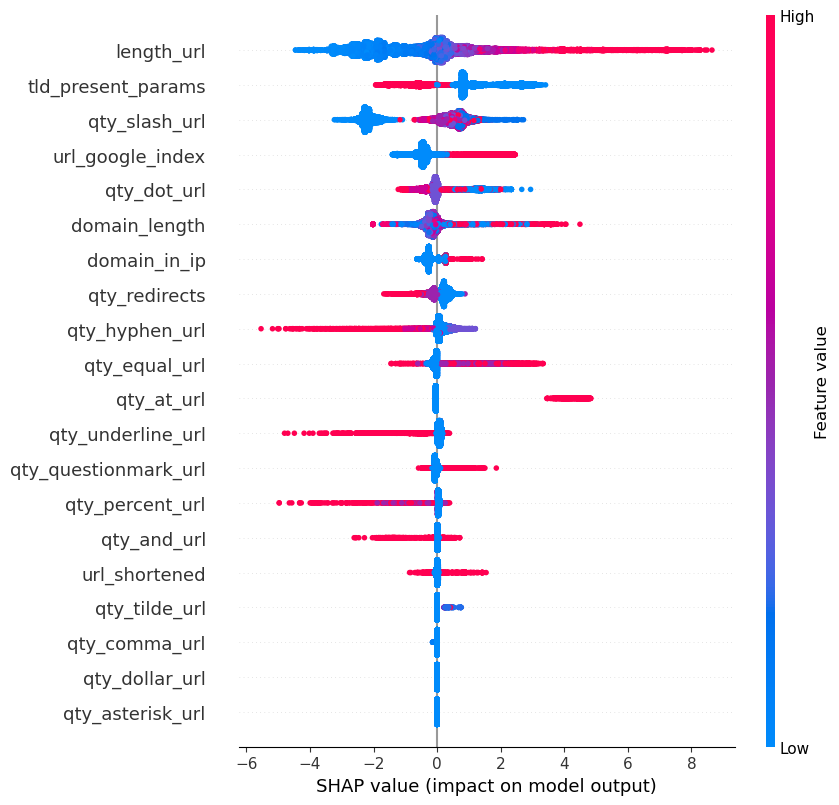

In [56]:
# Train on Dataset-1+2 (Oversampled), Test on Dataset-1+2
shap.plots.beeswarm(shap_values_9, max_display=20)

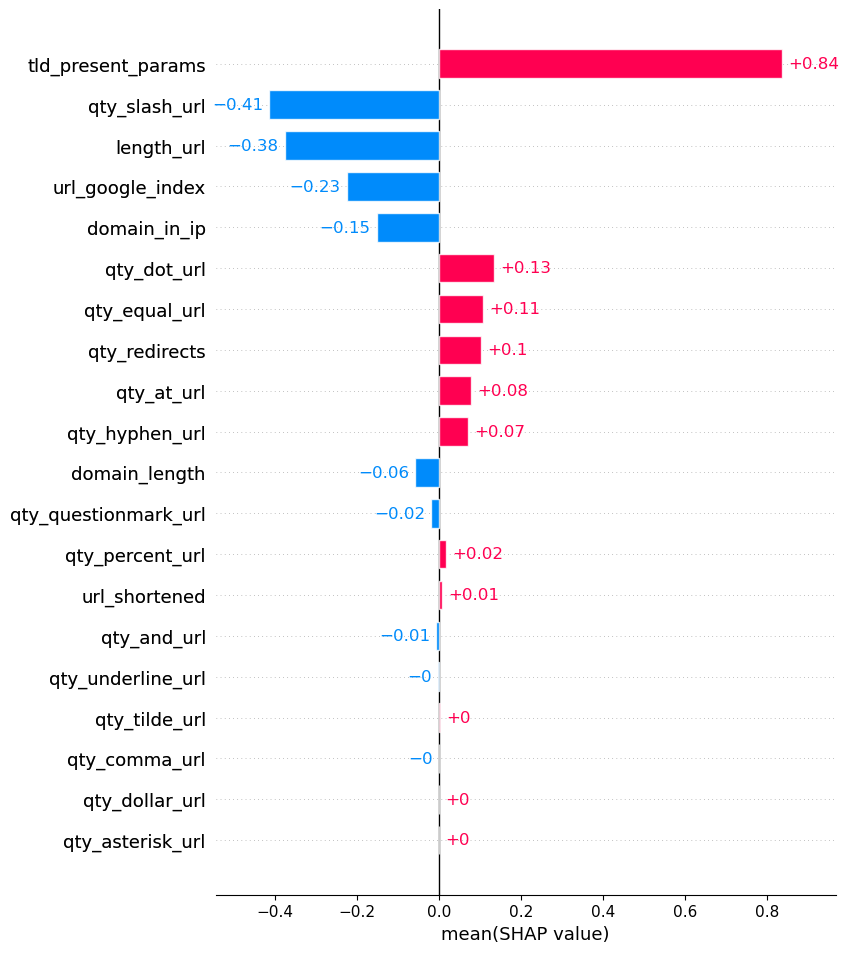

In [57]:
shap.plots.bar(shap_values_9.mean(0), max_display=20)

In [58]:
###train on D_merge test on D_1
explainer_7 = shap.Explainer(_70_30_xgb_classifier_1, df_merged_train[df_merged_train.columns[:-1]])

shap_values_7 = explainer_7(balanced_d1_merge_test[balanced_d1_merge_test.columns[:-1]])

 98%|===================| 18071/18418 [00:40<00:00]        

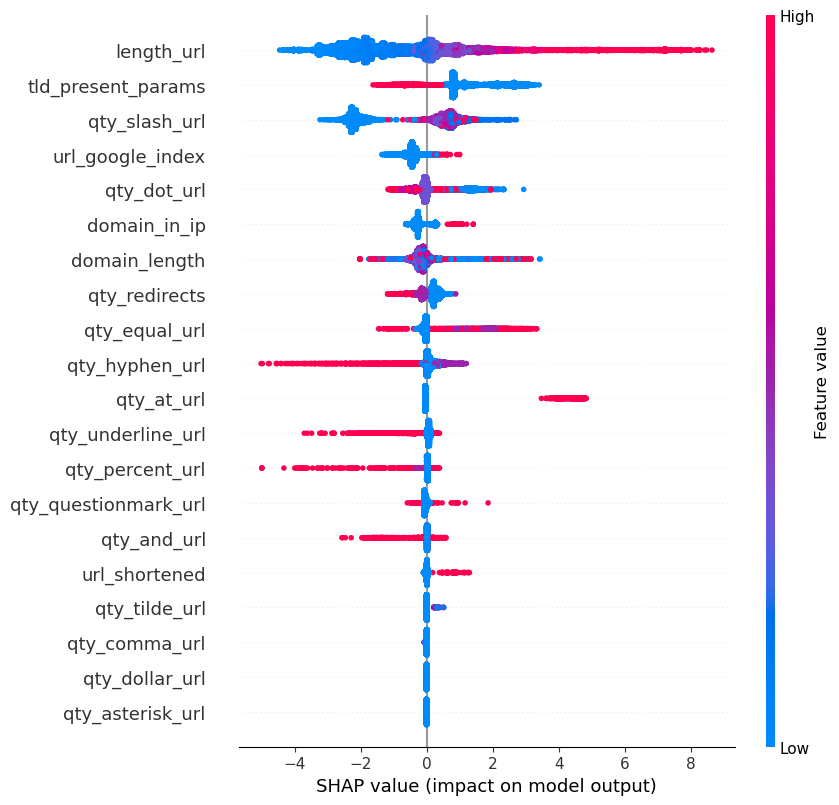

In [59]:
# Train on Dataset-1+2 (Oversampled), Test on Dataset-1
shap.plots.beeswarm(shap_values_7, max_display=20)

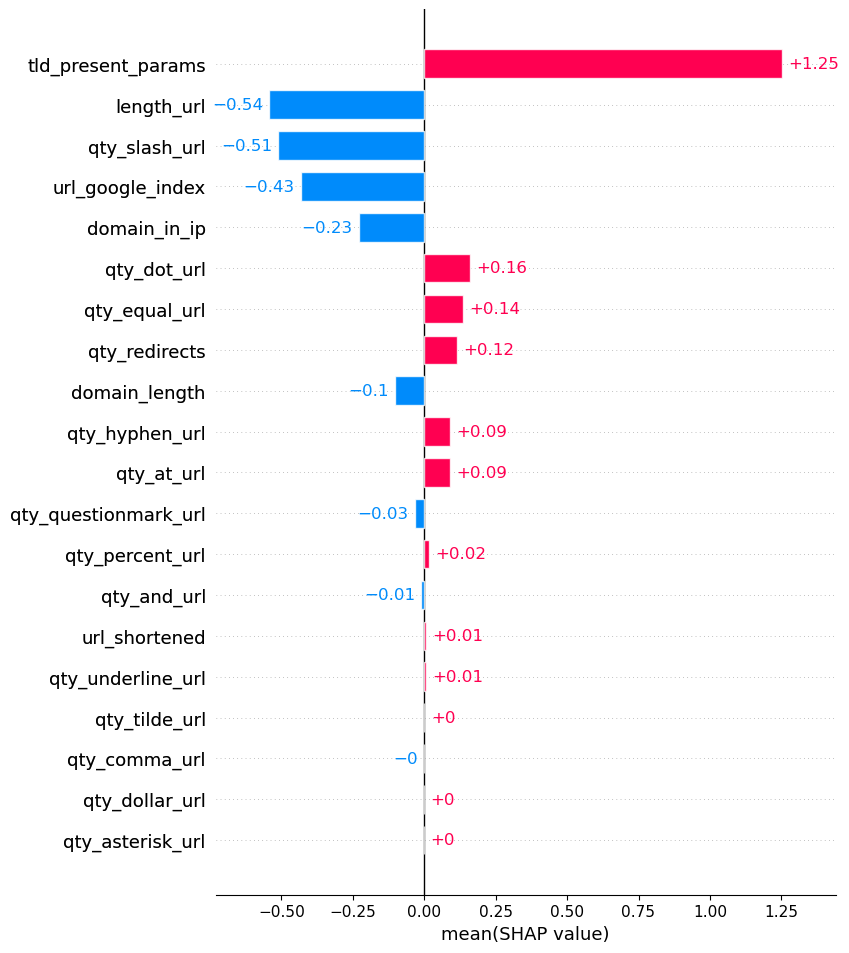

In [60]:
shap.plots.bar(shap_values_7.mean(0), max_display=20)

In [61]:
###train on D_merge test on D_2
explainer_8 = shap.Explainer(_70_30_xgb_classifier_2, df_merged_train[df_merged_train.columns[:-1]])

shap_values_8 = explainer_8(d2_test[d2_test.columns[:-1]])

 98%|===================| 5735/5830 [00:13<00:00]        

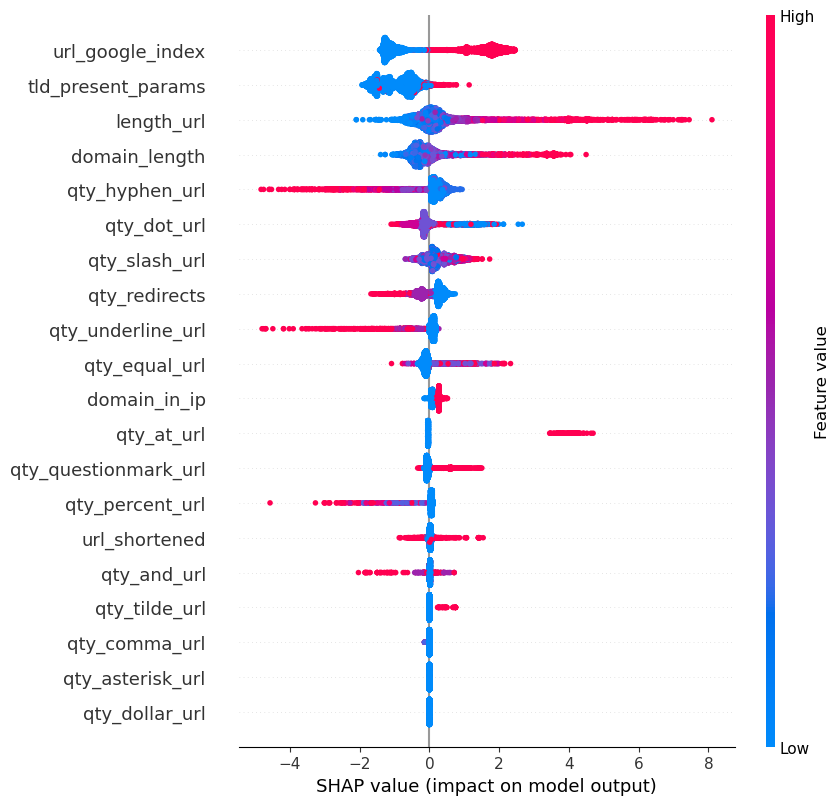

In [62]:
# Train on Dataset-1+2 (Oversampled), Test on Dataset-2
shap.plots.beeswarm(shap_values_8, max_display=20)

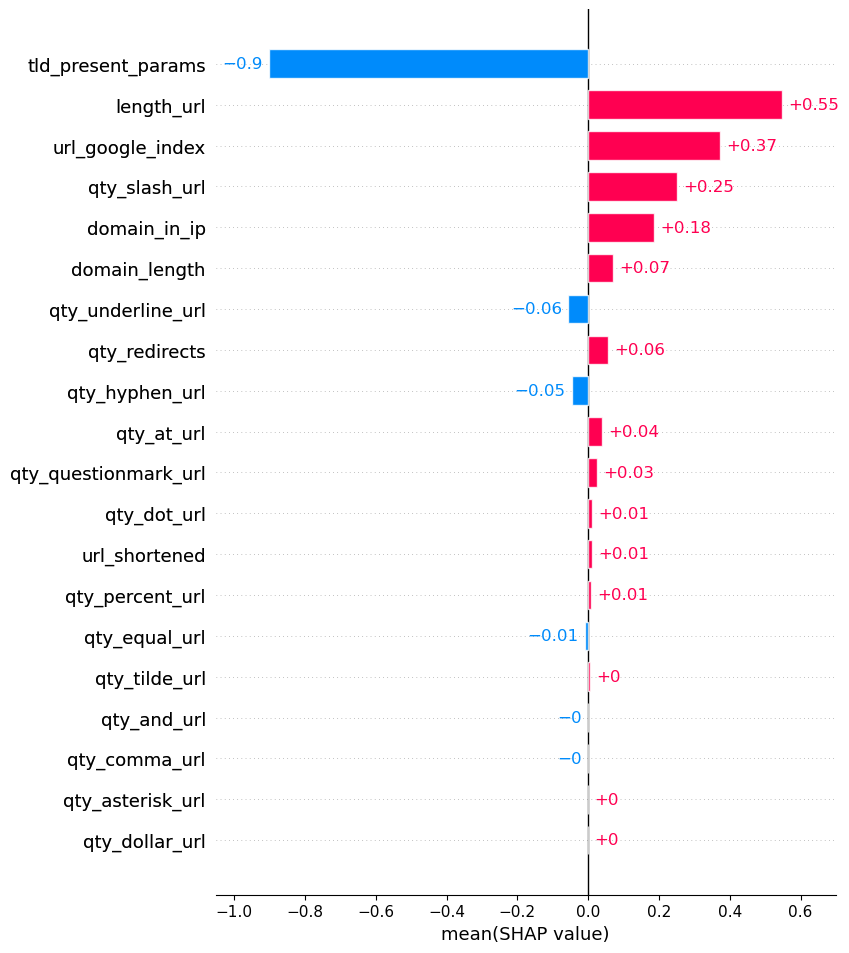

In [63]:
shap.plots.bar(shap_values_8.mean(0), max_display=20)